In [1]:
import json
import networkx as nx
import torch
import torch_geometric.transforms as T
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx

import glgexplainer.utils as utils
from glgexplainer.local_explainations import read_lattice, lattice_classnames
from glgexplainer.models import LEN, GLGExplainer, LEEmbedder
from gnn4ua.datasets.loader import Targets, GeneralisationModes

In [2]:
DATASET_NAME = Targets.Distributive
generalisation_mode = GeneralisationModes.weak
task = DATASET_NAME
with open(f"config/{DATASET_NAME}_params.json") as json_file:
	hyper_params = json.load(json_file)

In [3]:
adjs_train, edge_weights_train, ori_classes_train, belonging_train, summary_predictions_train, le_classes_train = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='train'
)

adjs_test, edge_weights_test, ori_classes_test, belonging_test, summary_predictions_test, le_classes_test = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='test'
)

device = "cpu"  # torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
	T.NormalizeFeatures(),
])

In [13]:
dataset_train = utils.LocalExplanationsDataset("data_glg", adjs_train, "same",
											   transform=transform,
											   y=le_classes_train,
											   belonging=belonging_train,
											   task_y=ori_classes_train)
dataset_test = utils.LocalExplanationsDataset("data_glg", adjs_test, "same",
											  transform=transform,
											  y=le_classes_test,
											  belonging=belonging_test,
											  task_y=ori_classes_test)

train_group_loader = utils.build_dataloader(dataset_train, belonging_train,
											num_input_graphs=128)
test_group_loader = utils.build_dataloader(dataset_test, belonging_test,
										   num_input_graphs=256)

/Users/luke/PycharmProjects/AI4UA/glgexplainer/utils.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr=torch.tensor(t.weight).reshape(-1, 1),


In [14]:
torch.manual_seed(42)
len_model = LEN(hyper_params["num_prototypes"],
				hyper_params["LEN_temperature"],
				remove_attention=hyper_params["remove_attention"]).to(device)
le_model = LEEmbedder(num_features=hyper_params["num_le_features"],
					  activation=hyper_params["activation"],
					  num_hidden=hyper_params["dim_prototypes"]).to(device)
expl = GLGExplainer(len_model,
					le_model,
					device=device,
					hyper_params=hyper_params,
					classes_names=lattice_classnames,
					dataset_name=DATASET_NAME,
					num_classes=len(
						train_group_loader.dataset.data.task_y.unique())
					).to(device)

/Users/luke/.pyenv/versions/L65_Project/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


(array([0., 3.], dtype=float32), array([    8, 15014]))
[0.9949518  0.00391428]


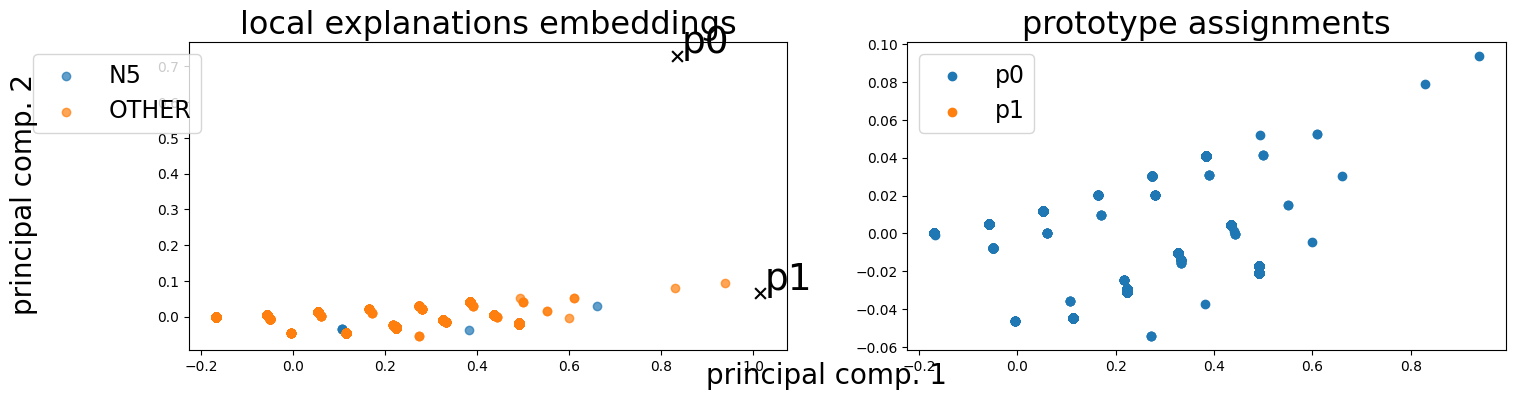

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.999467 +- 0.000000
Concept distribution:  (array([0]), array([15022]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)
  1: Loss: 0.11108, LEN: 0.071390, Acc: 0.35, V. Acc: 0.73, V. Loss: 0.08477, V. LEN 0.066
  2: Loss: 0.07063, LEN: 0.067630, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.07938, V. LEN 0.062
  3: Loss: 0.06680, LEN: 0.064475, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.07567, V. LEN 0.060
  4: Loss: 0.06551, LEN: 0.063598, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.07156, V. LEN 0.060
  5: Loss: 0.06512, LEN: 0.063319, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.07104, V. LEN 0.060
  6: Loss: 0.06468, LEN: 0.063167, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06934, V. LEN 0.060
  7: Loss: 0.06435, LEN: 0.063056, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.07235, V. LEN 0.060
  8: Loss: 0.06443, LEN: 0.063130, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06699, V. LEN 0.060
  9: L

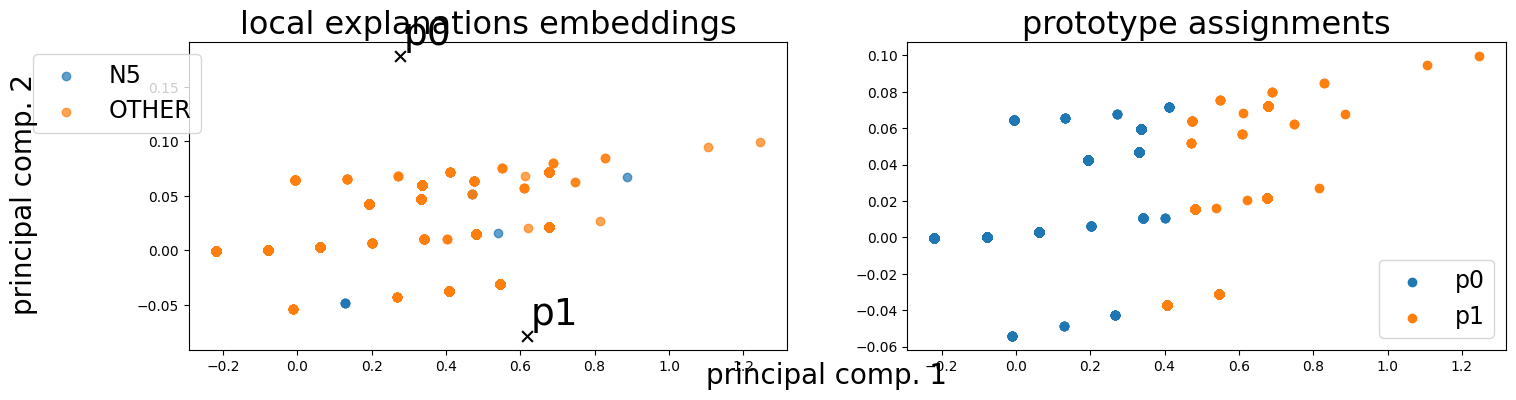

Alpha norms:
tensor([[0.9286, 1.0000],
        [0.2960, 1.0000]])
Concept Purity: 0.999242 +- 0.000413
Concept distribution:  (array([0, 1]), array([11607,  3415]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7234)

 20: Loss: 0.06270, LEN: 0.062232, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05794, V. LEN 0.057
 21: Loss: 0.06204, LEN: 0.061612, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05821, V. LEN 0.056
 22: Loss: 0.06057, LEN: 0.060150, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05588, V. LEN 0.054
 23: Loss: 0.05899, LEN: 0.058610, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05397, V. LEN 0.053
 24: Loss: 0.05816, LEN: 0.057758, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05398, V. LEN 0.053
 25: Loss: 0.05614, LEN: 0.055688, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05366, V. LEN 0.053
 26: Loss: 0.05699, LEN: 0.056509, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.04458, V. LEN 0.044
 27: Loss: 0.05684, LEN: 0.056436, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.07144, V. L

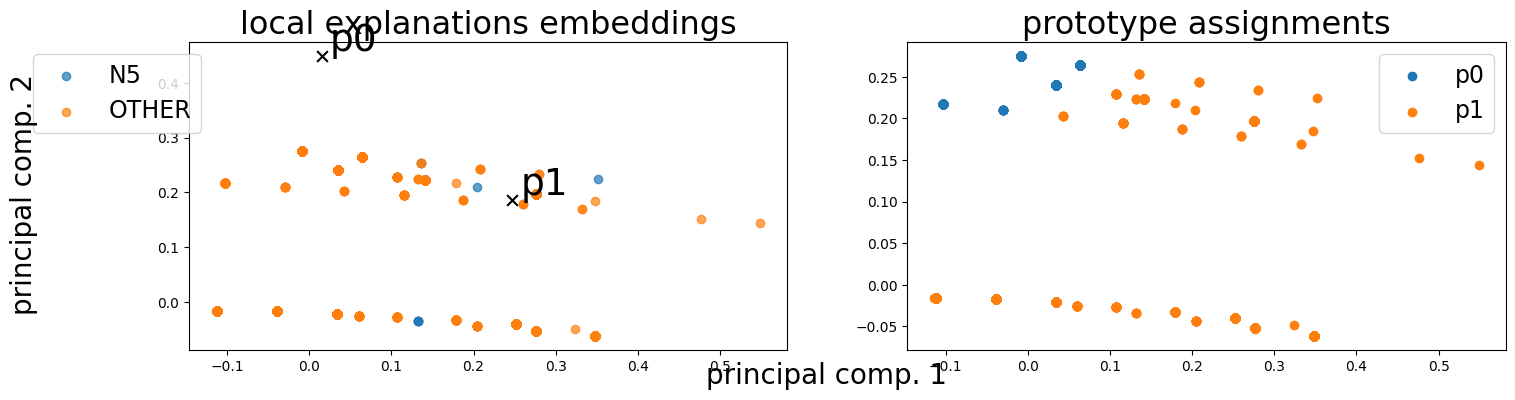

Alpha norms:
tensor([[1.0000, 0.9043],
        [0.3406, 1.0000]])
Concept Purity: 0.999717 +- 0.000283
Concept distribution:  (array([0, 1]), array([  908, 14114]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7234)

 40: Loss: 0.05779, LEN: 0.057634, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05781, V. LEN 0.057
 41: Loss: 0.05796, LEN: 0.057811, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05801, V. LEN 0.057
 42: Loss: 0.05767, LEN: 0.057512, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05971, V. LEN 0.058
 43: Loss: 0.05786, LEN: 0.057711, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05823, V. LEN 0.057
 44: Loss: 0.05790, LEN: 0.057776, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06027, V. LEN 0.059
 45: Loss: 0.05785, LEN: 0.057710, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05879, V. LEN 0.057
 46: Loss: 0.05770, LEN: 0.057563, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05875, V. LEN 0.058
 47: Loss: 0.05763, LEN: 0.057492, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05881, V. L

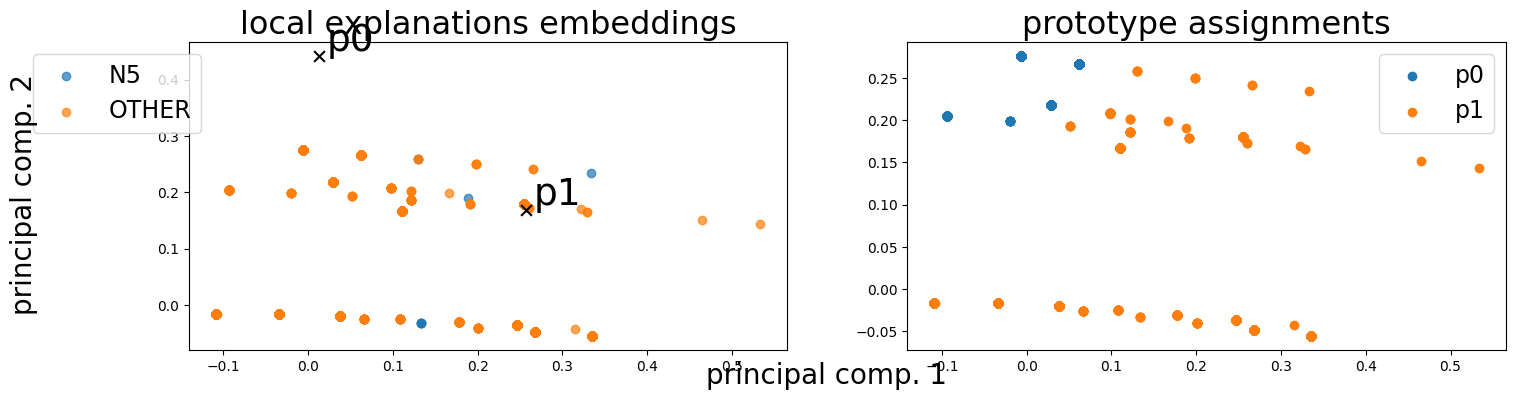

Alpha norms:
tensor([[1.0000, 0.8063],
        [0.3440, 1.0000]])
Concept Purity: 0.999717 +- 0.000283
Concept distribution:  (array([0, 1]), array([  908, 14114]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7234)

 60: Loss: 0.05699, LEN: 0.056873, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05939, V. LEN 0.058
 61: Loss: 0.05749, LEN: 0.057347, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05895, V. LEN 0.058
 62: Loss: 0.05669, LEN: 0.056550, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05923, V. LEN 0.058
 63: Loss: 0.05656, LEN: 0.056436, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05962, V. LEN 0.059
 64: Loss: 0.05715, LEN: 0.057008, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05939, V. LEN 0.058
 65: Loss: 0.05694, LEN: 0.056821, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05943, V. LEN 0.059
 66: Loss: 0.05638, LEN: 0.056260, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05984, V. LEN 0.059
 67: Loss: 0.05715, LEN: 0.057013, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05939, V. L

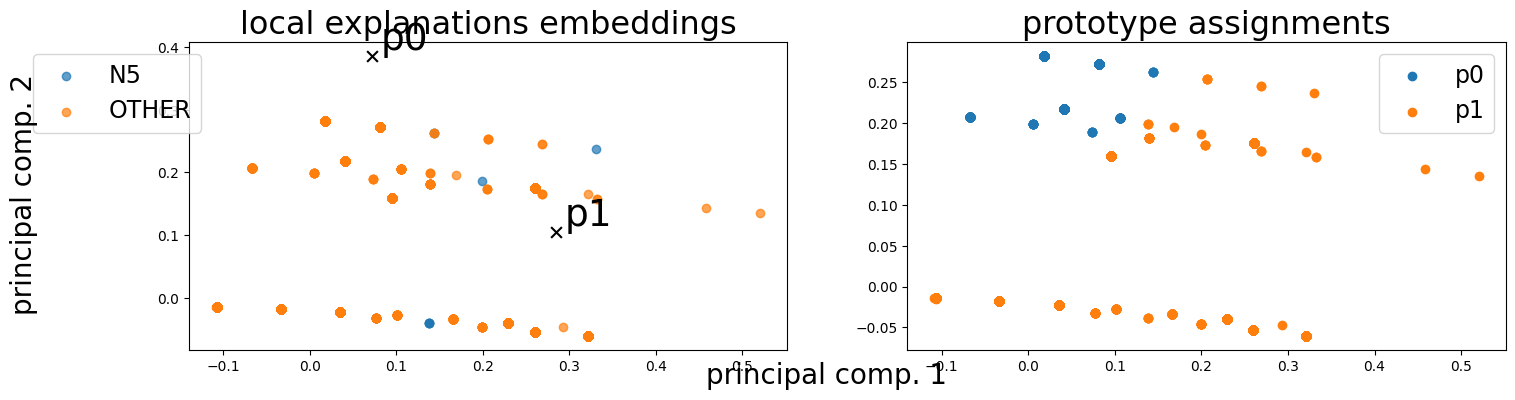

Alpha norms:
tensor([[1.0000, 0.8568],
        [0.3482, 1.0000]])
Concept Purity: 0.998728 +- 0.000846
Concept distribution:  (array([0, 1]), array([  944, 14078]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7234)

 80: Loss: 0.05644, LEN: 0.056326, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05942, V. LEN 0.059
 81: Loss: 0.05637, LEN: 0.056245, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05996, V. LEN 0.059
 82: Loss: 0.05680, LEN: 0.056650, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05959, V. LEN 0.059
 83: Loss: 0.05680, LEN: 0.056677, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05967, V. LEN 0.059
 84: Loss: 0.05656, LEN: 0.056447, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05977, V. LEN 0.059
 85: Loss: 0.05606, LEN: 0.055952, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06213, V. LEN 0.061
 86: Loss: 0.05664, LEN: 0.056533, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05917, V. LEN 0.058
 87: Loss: 0.05619, LEN: 0.056079, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06005, V. L

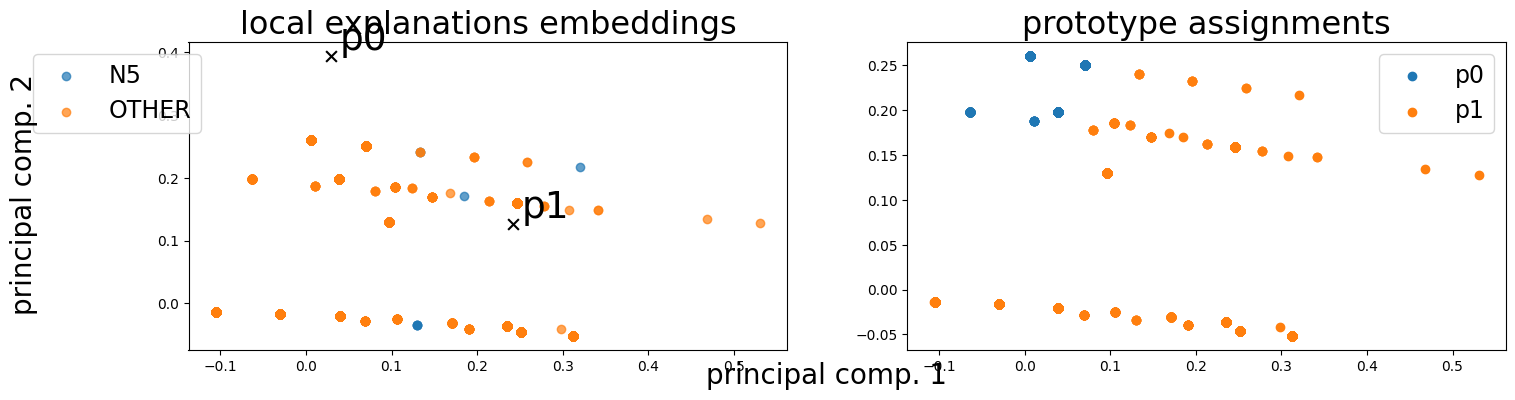

Alpha norms:
tensor([[1.0000, 0.8396],
        [0.3462, 1.0000]])
Concept Purity: 0.999717 +- 0.000283
Concept distribution:  (array([0, 1]), array([  908, 14114]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7234)

100: Loss: 0.05587, LEN: 0.055768, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06025, V. LEN 0.059
101: Loss: 0.05586, LEN: 0.055759, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06020, V. LEN 0.059
102: Loss: 0.05642, LEN: 0.056302, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05994, V. LEN 0.059
103: Loss: 0.05650, LEN: 0.056389, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06002, V. LEN 0.059
104: Loss: 0.05650, LEN: 0.056368, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.05985, V. LEN 0.059
105: Loss: 0.05613, LEN: 0.056025, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06037, V. LEN 0.060
106: Loss: 0.05594, LEN: 0.055828, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06038, V. LEN 0.060
107: Loss: 0.05673, LEN: 0.056608, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06012, V. L

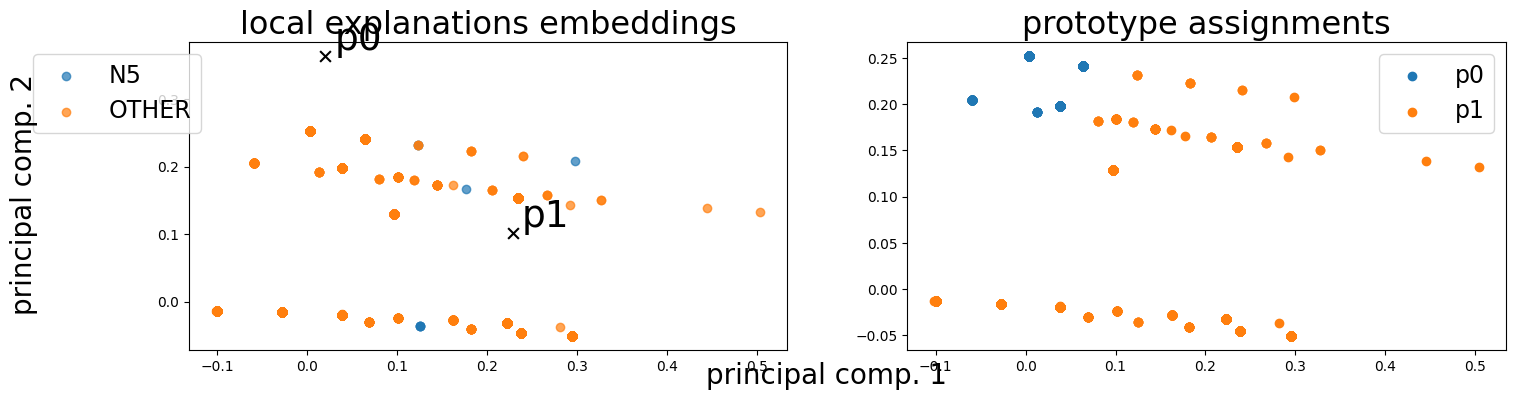

Alpha norms:
tensor([[1.0000, 0.8712],
        [0.3443, 1.0000]])
Concept Purity: 0.999717 +- 0.000283
Concept distribution:  (array([0, 1]), array([  908, 14114]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7234)


120: Loss: 0.05560, LEN: 0.055497, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06063, V. LEN 0.060
121: Loss: 0.05572, LEN: 0.055628, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06046, V. LEN 0.060
122: Loss: 0.05608, LEN: 0.055972, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06026, V. LEN 0.060
123: Loss: 0.05558, LEN: 0.055449, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06059, V. LEN 0.060
124: Loss: 0.05574, LEN: 0.055613, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06034, V. LEN 0.060
125: Loss: 0.05656, LEN: 0.056467, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06018, V. LEN 0.059
126: Loss: 0.05562, LEN: 0.055511, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06068, V. LEN 0.060
127: Loss: 0.05536, LEN: 0.055268, Acc: 0.72, V. Acc: 0.73, V. Loss: 0.06050, V. 

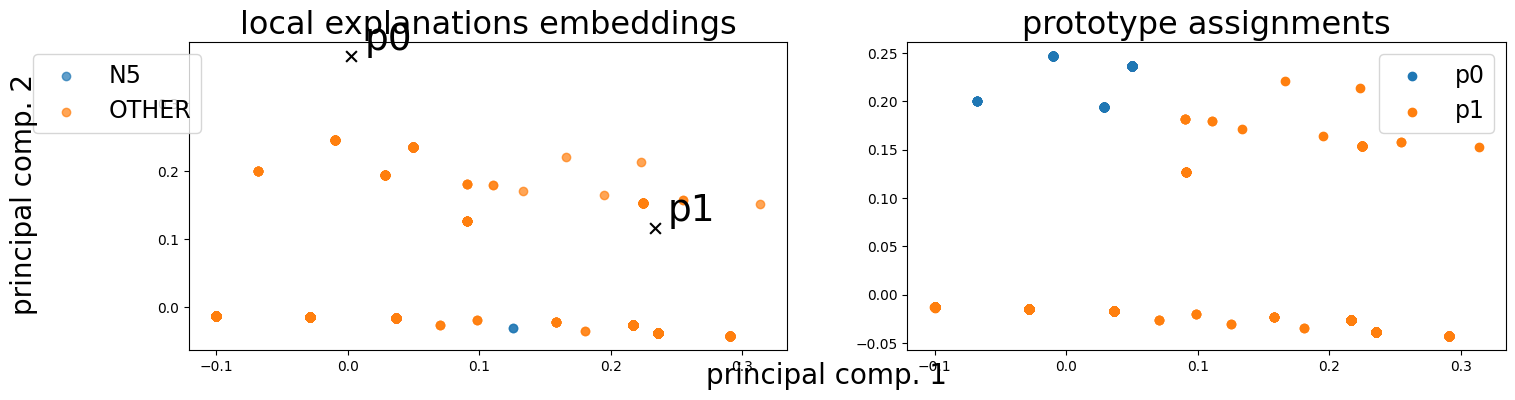

Alpha norms:
tensor([[1.0000, 0.8630],
        [0.3459, 1.0000]])
Concept Purity: 0.997383 +- 0.002034
Concept distribution:  (array([0, 1]), array([ 215, 3427]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7257)


In [15]:
expl.iterate(train_group_loader, test_group_loader, plot=True)
expl.inspect(test_group_loader)

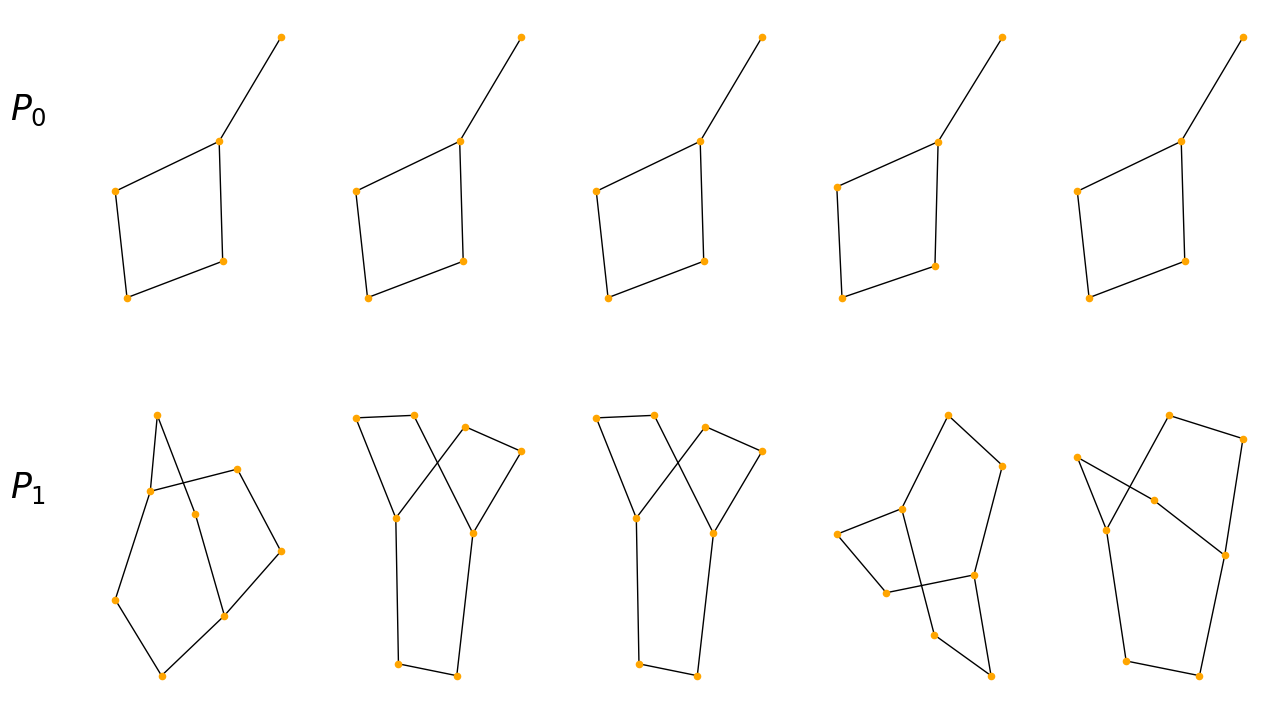

In [16]:
expl.hyper["assign_func"] = "sim"

x_train, emb, concepts_assignement, y_train_1h, le_classes, le_idxs, belonging = expl.get_concept_vector(
	test_group_loader,
	return_raw=True)
expl.hyper["assign_func"] = "discrete"

proto_names = {
	0: "BA",
	1: "Wheel",
	2: "Mix",
	3: "Grid",
	4: "House",
	5: "Grid",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(15, 5 * 1.8))
n = 0
for p in range(expl.hyper["num_prototypes"]):
	idxs = le_idxs[concepts_assignement.argmax(-1) == p]
	# idxs = idxs[torch.randperm(len(idxs))]    # random
	sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
	idxs = idxs[torch.argsort(sa[:, p], descending=True)]
	for ex in range(min(5, len(idxs))):
		n += 1
		ax = plt.subplot(expl.hyper["num_prototypes"], 5, n)
		G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True,
						remove_self_loops=True)
		pos = nx.spring_layout(G, seed=42)
		nx.draw(G, pos, node_size=20, ax=ax, node_color="orange")
		ax.axis("on")
		plt.box(False)

for p in range(expl.hyper["num_prototypes"]):
	plt.subplot(expl.hyper["num_prototypes"], 5, 5 * p + 1)
	plt.ylabel(f"$P_{p}$\n", size=25, rotation="horizontal",
			   labelpad=50)

plt.show()

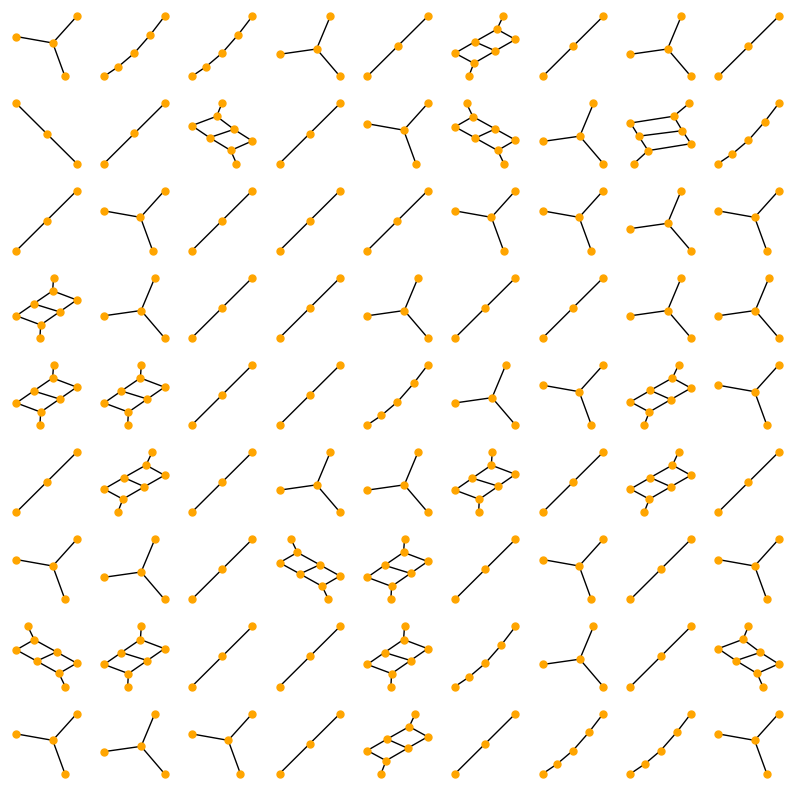

In [4]:
fig, axs = plt.subplots(9, 9, figsize=(10, 10))
axs = axs.flatten()

for i in range(81):
	G = nx.Graph(adjs_train[i], undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=25)

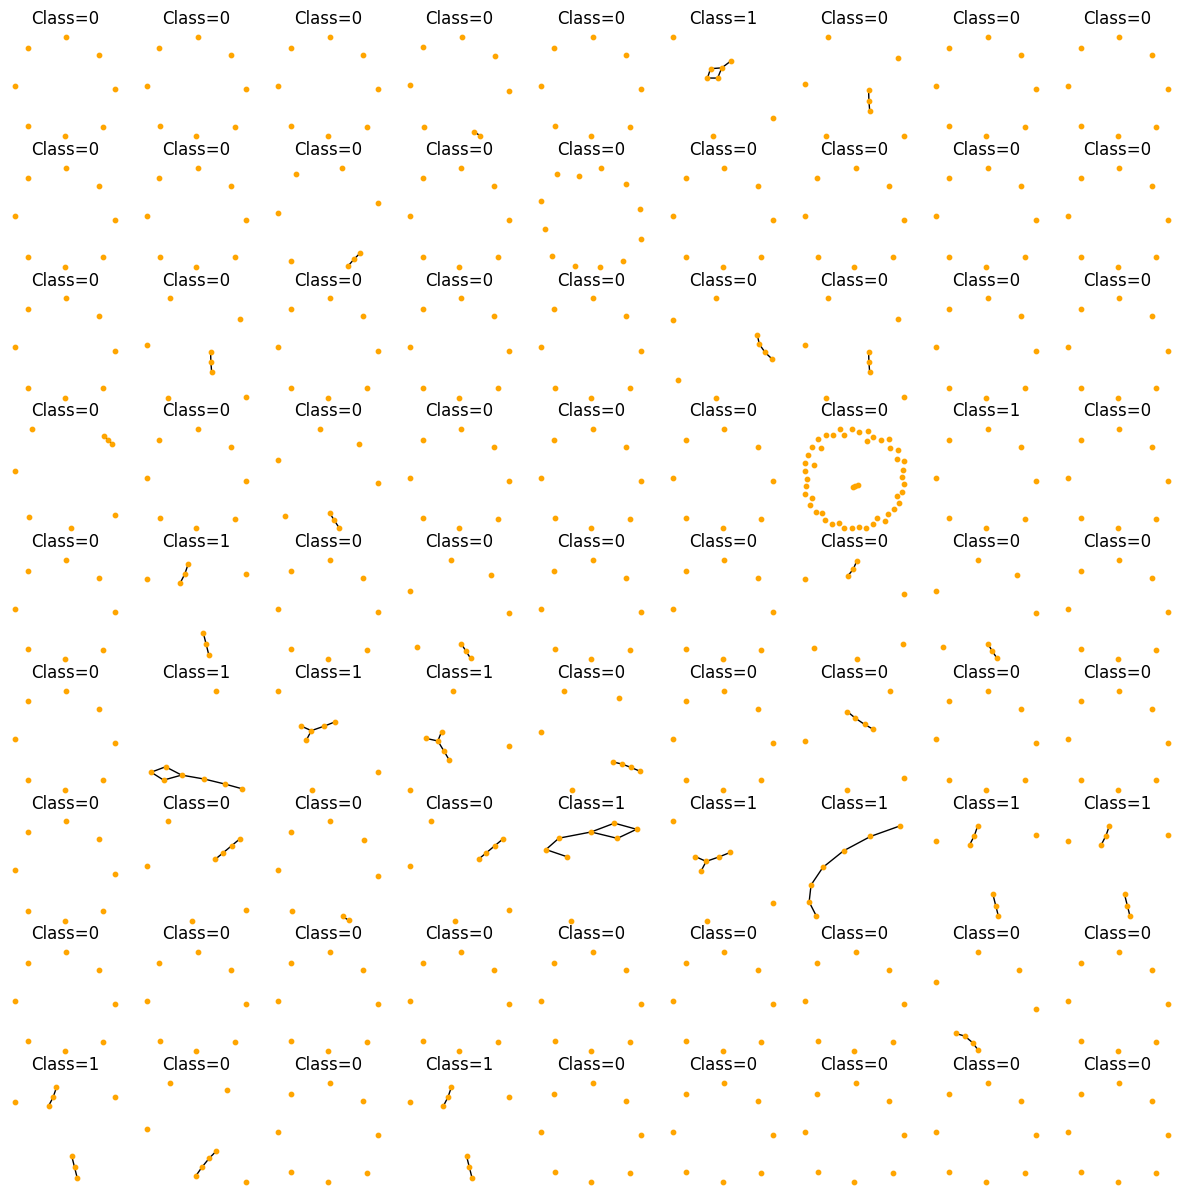

In [5]:
import numpy as np
data = np.load("local_features/PGExplainer/Distributive_weak/x_train.npz")
y = np.load("local_features/PGExplainer/Distributive_weak/y_train.npy")
adjs = list(data.values())

fig, axs = plt.subplots(9, 9, figsize=(15, 15))
axs = axs.flatten()

for i in range(81):
	adj = adjs[i].squeeze()
	adj[adj > 0] = 1
	G = nx.Graph(adj, undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=10)
	axs[i].set_title(f'Class={y[i]}')